In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
from IPython.display import HTML
import plotly.express as px

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [11]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [15]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
print("This dataset has " , exercise_df.shape[0] , "instances and " , exercise_df.shape[1] , "columns.")

This dataset has  15000 instances and  9 columns.


In [28]:
print("Columns : ")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
    print("\n" , i+1 , "." , column)

Columns : 

 1 . User_ID

 2 . Gender

 3 . Age

 4 . Height

 5 . Weight

 6 . Duration

 7 . Heart_Rate

 8 . Body_Temp

 9 . Calories


In [30]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [34]:
exercise_df.iloc[:,1:]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


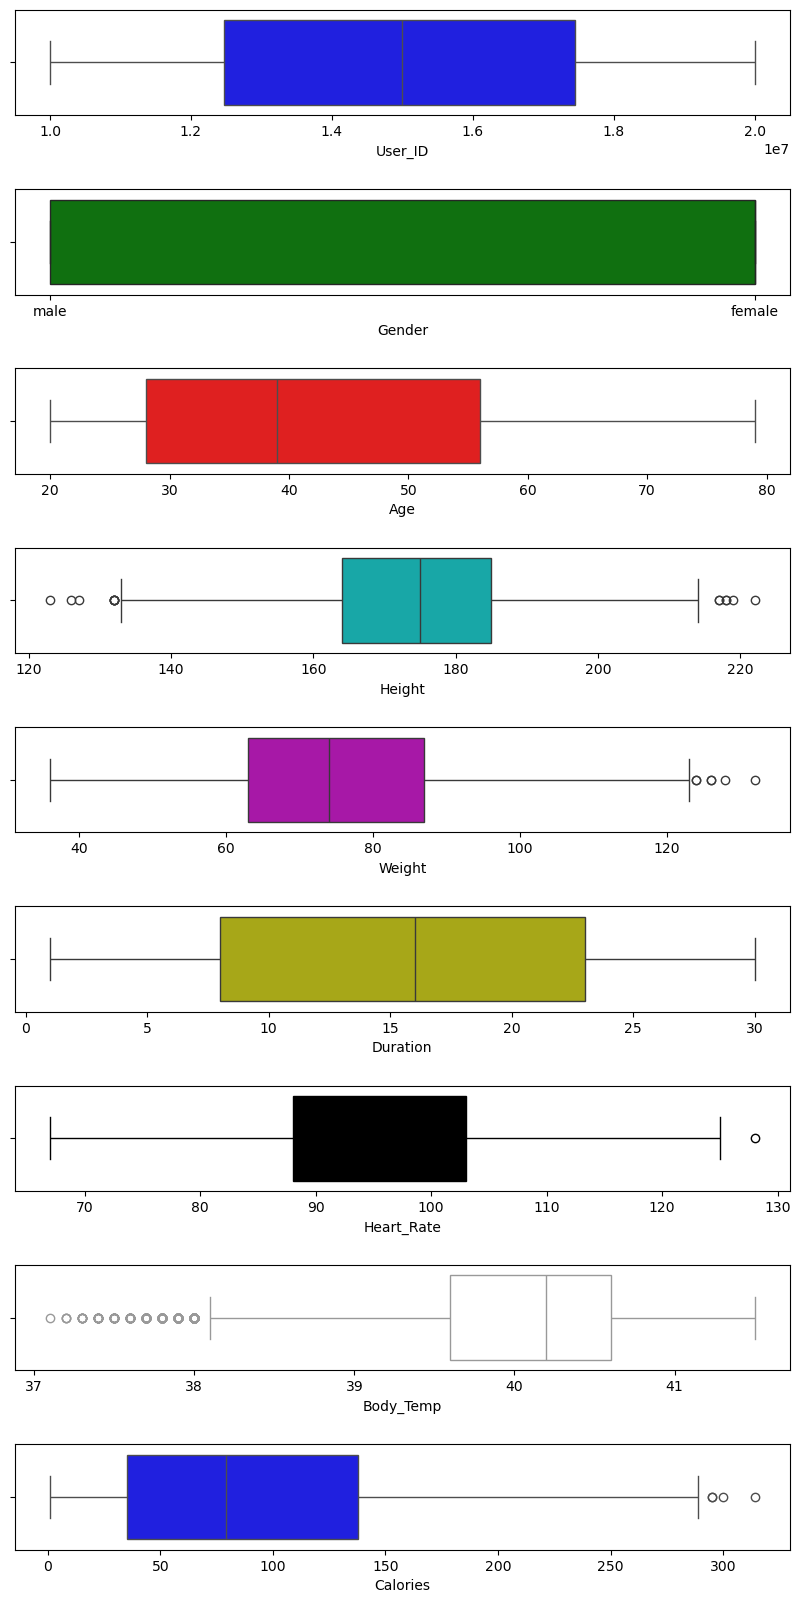

In [38]:
c = ['b' , 'g' , 'r' , 'c' , 'm' ,'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
    try:
        sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

In [40]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

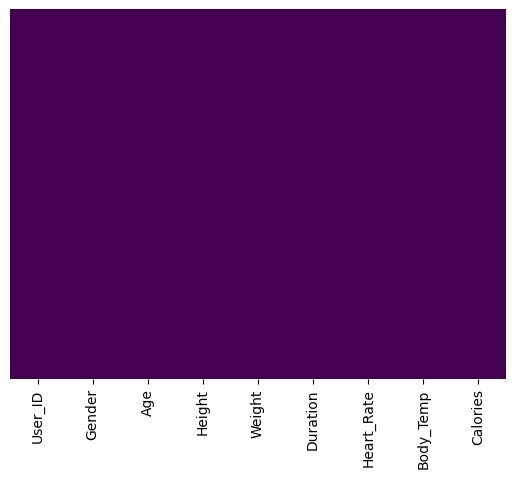

In [48]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

In [50]:
exercise_df.isnull()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [54]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)
